In [1]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# Setup pytrend library and keyword define

In [21]:
pytrends = TrendReq(hl='en-US', tz=360)
keyword = "Data Science"

# Data Request

In [22]:
pytrends.build_payload([keyword], cat=0, timeframe = 'today 12-m', geo='', gprop='')

# Country wise Interest

In [26]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending=False).head(15)

C:\Users\Hritwik Das\AppData\Local\Temp\ipykernel_25784\3253904892.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




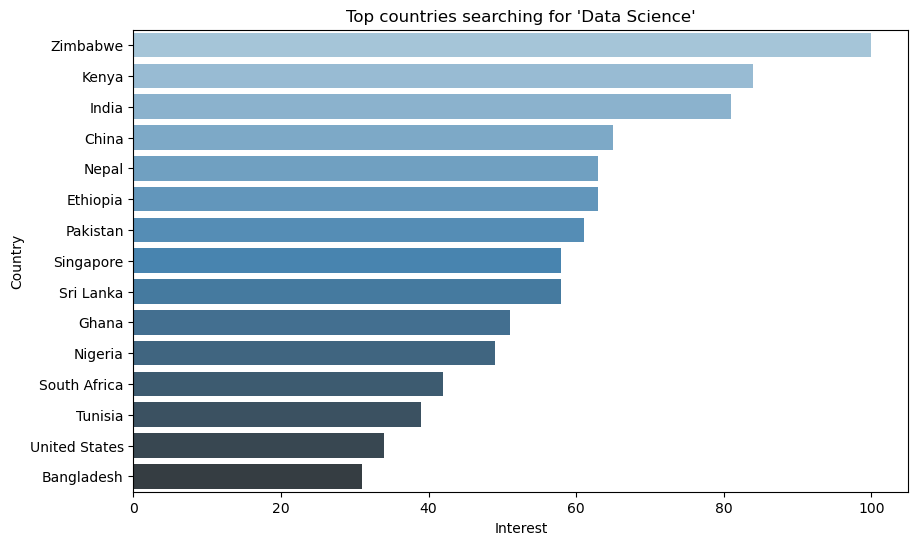

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword], y=region_data.index, palette="Blues_d")
plt.title(f"Top countries searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# World Map

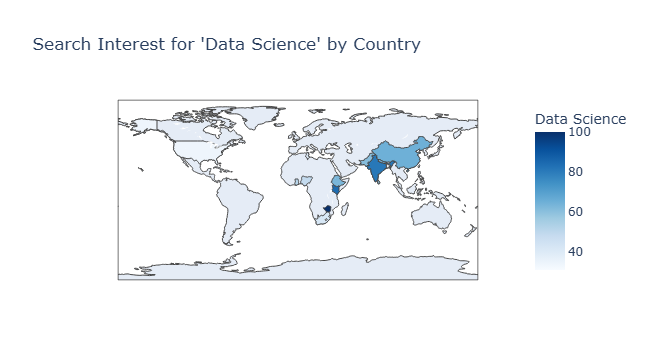

In [28]:
region_data=region_data.reset_index()
fig = px.choropleth(region_data,
                     locations='geoName',
                     locationmode='country names',
                     color=keyword,
                     title=f"Search Interest for '{keyword}' by Country",
                     color_continuous_scale='Blues')
fig.show()

# Time wise Interest

In [29]:
time_df=pytrends.interest_over_time()

C:\Users\Hritwik Das\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



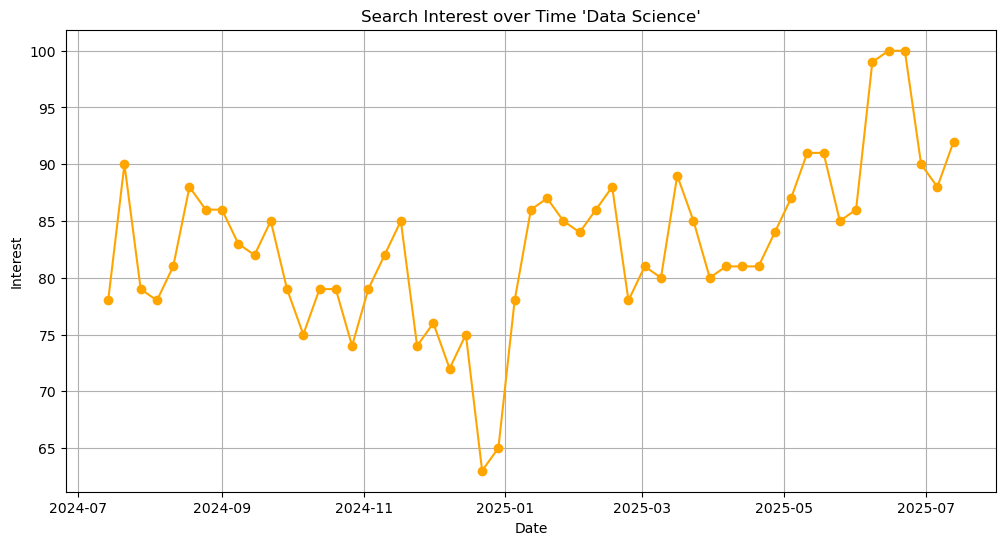

In [30]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='orange')
plt.title(f"Search Interest over Time '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple Keywords Comparison

In [31]:
kw_list = ["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

C:\Users\Hritwik Das\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



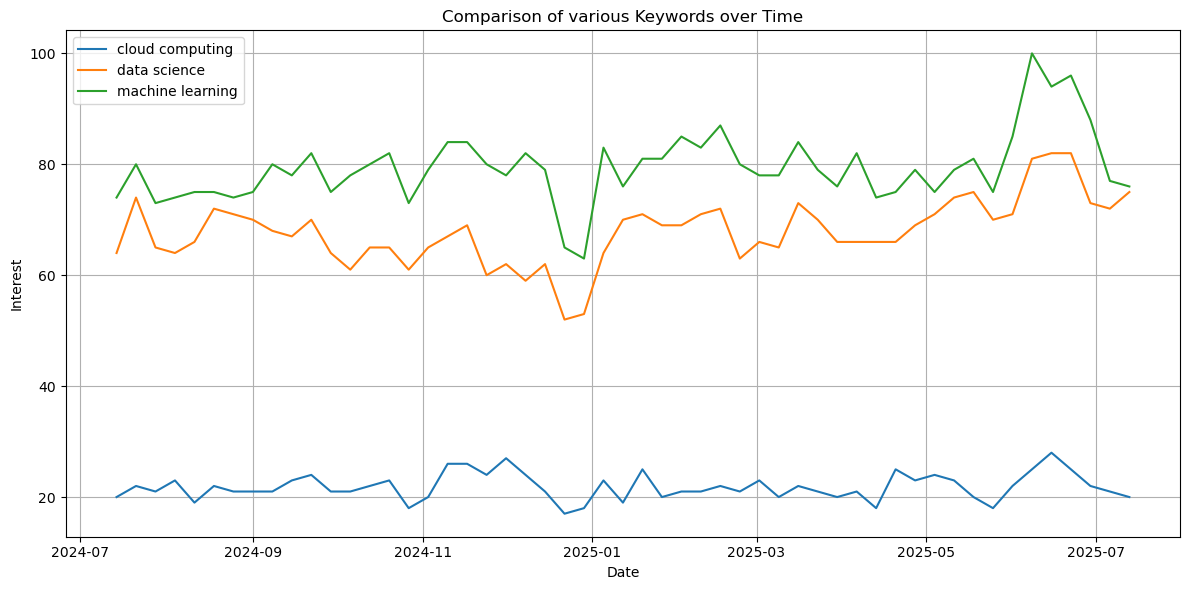

In [32]:
compare_df=pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label=kw)

plt.title("Comparison of various Keywords over Time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()